# Exploring Correlations between Domain Name Features and Ranking

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In this notebook, we try to determine if there are ny correlation between certain features extracted from domain names and the average Alexa ranking. The data used in this notebook is generated by this [script](https://github.com/sheikhomar/mako/blob/master/src/data/spark/domain_features.py). 

In [3]:
data_path = '../data/external/combined-features.csv'
df = pd.read_csv(data_path, names=['length', 'dot_count', 'digit_ratio', 'vowel_ratio', 'entropy', 'ideal_entropy', 'is_gtld', 'avg_ranking'])

In [13]:
df.head()

,length,dot_count,digit_ratio,vowel_ratio,etp,etp_ideal,is_gtld,avg_ranking
0,12,0,1,0,2.405639,3.000000,1,46337
1,14,0,3,3,3.121928,3.321928,1,64946
2,10,0,6,6,2.584963,2.584963,1,83686
3,15,0,11,5,3.459432,3.459432,1,79201
4,10,0,2,6,2.584963,2.584963,1,5283


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103575 entries, 0 to 103574
Data columns (total 8 columns):
length         103575 non-null int64
dot_count      103575 non-null int64
digit_ratio    103575 non-null int64
vowel_ratio    103575 non-null int64
etp            103575 non-null float64
etp_ideal      103575 non-null float64
is_gtld        103575 non-null int64
avg_ranking    103575 non-null int64
dtypes: float64(2), int64(6)
memory usage: 6.3 MB


We need to identify which features are categorical.

In [7]:
unq = { 
    column : df[column].nunique()
    for column in df.columns
}
unq

{'avg_ranking': 64197,
 'digit_ratio': 40,
 'dot_count': 4,
 'etp': 1050,
 'etp_ideal': 50,
 'is_gtld': 2,
 'length': 53,
 'vowel_ratio': 21}

We already knew that `is_gtld` is a Boolean feature. Moreover, we can see that `dot_count` has only 4 distinct values. We can mark them as categorical. 

In [8]:
df['dot_count'] = df['dot_count'].astype('category')
df['is_gtld'] = df['is_gtld'].astype('category')

For binary feature, we use Point-Biserial to compute correlation.

In [9]:
from scipy import stats
stats.pointbiserialr(df['is_gtld'], df['avg_ranking'])

PointbiserialrResult(correlation=-0.030168018167854031, pvalue=2.7043643975384784e-22)

There is a slight negative correlation between gTLD and ranking. Now, let us check if there are correlation between each of the other numerical features.

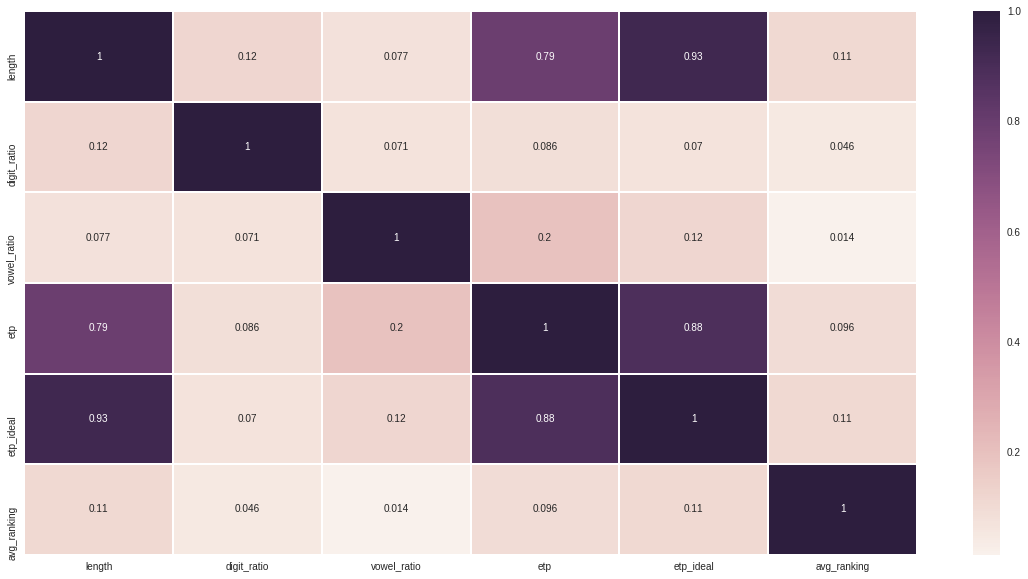

In [11]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True, linewidths=1)

Sadly, there are no strong correlations between the other features and the ranking.